# Exercices séance 5

## Exercice 1

- 1.1 Calculer le nombre de mots par abstract
- 1.2 En réaliser l'histogramme
- 1.3 Ajouter une barre verticale sur le nombre moyen de mots (piste : plt.axvline)

## Exercice 2
Reproduire la figure dans plotly (pistes : px.histogram / .add_vline)

### 1.1 Calculer le nombre de mots par abstract

In [1]:
# Commencer par importer pandas
import pandas as pd

# Et lire les données
df = pd.read_csv("../../data/CSS_openalex.csv", low_memory=False)
# low_memory=False n'est pas obligatoire mais me permet d'éviter le message d'erreur

In [ ]:
# Calculer le nombre de mots par abstract

df["abstract_nb_mots"] = df["abstract"].str.split().str.len()

# On avait montré la fois d'avant avec lambda etc.
# Le soucis c'est qu'avec ça il me renverrait 1 pour les abstracts vides
# à cause de la façon dont str(x) fonctione avec les NA
# df["abstract_nb_mots_test"] = df["abstract"].apply(lambda x: len(str(x).split()))

In [ ]:
# pour vérifier :

# len(str(pd.NA).split())
# df["abstract"].isna().sum()
# df["abstract_nb_mots"].isna().sum()
# df["abstract_nb_mots_test"].isna().sum()

1

### 1.2 En réaliser l'histogramme

En une ligne avec pandas :

<Axes: ylabel='Frequency'>

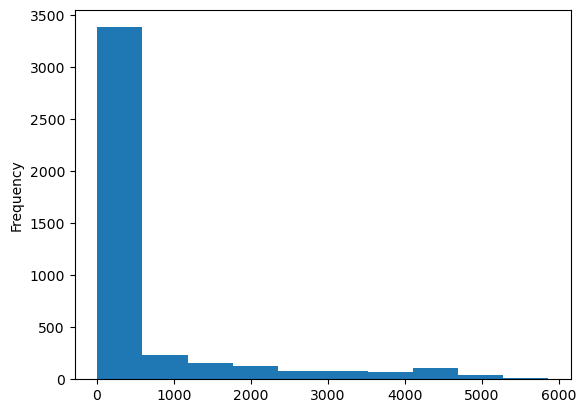

In [19]:
df["abstract_nb_mots"].plot(kind="hist")

Avec matplotlib :

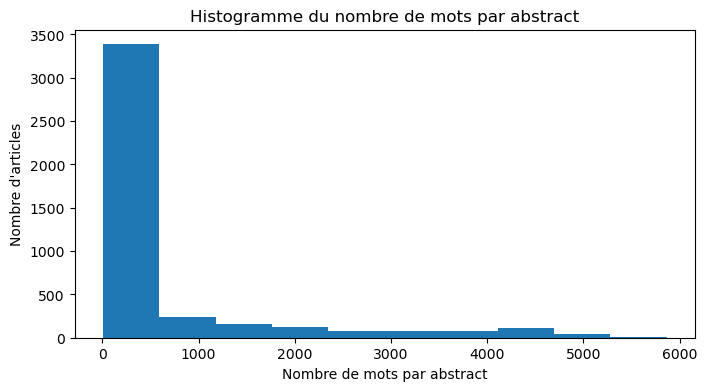

In [49]:
import matplotlib.pyplot as plt

# initializer
plt.figure(figsize=(8, 4))

# remplir
plt.hist(df["abstract_nb_mots"])

# Fignoler
plt.xlabel("Nombre de mots par abstract")
plt.ylabel("Nombre d'articles")
plt.title("Histogramme du nombre de mots par abstract")
plt.show()

### 1.3 Ajouter une barre verticale sur le nombre moyen de mots

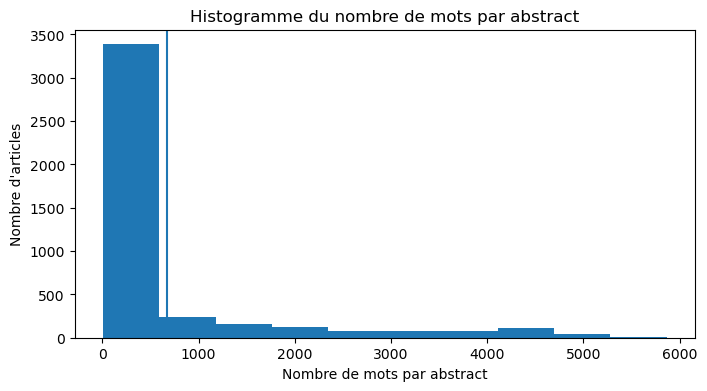

In [50]:
# repartir de ce que l'on a et ajouter la ligne

# Calcul du nombre moyen de mots par abstract
moyenne = df["abstract_nb_mots"].mean()

# initializer
plt.figure(figsize=(8, 4))

# remplir
plt.hist(df["abstract_nb_mots"])

# ajouter la ligne
# on peut customiser

plt.axvline(
    moyenne,
    # color="red", # couleur de la ligne
    # linestyle="dashed", # sont style
    # linewidth=2, # son épaisseur
    # label=f"Moyenne = {moyenne:.0f}", # ajouter une légende pour la moyenne
)

# Fignoler
plt.xlabel("Nombre de mots par abstract")
plt.ylabel("Nombre d'articles")
plt.title("Histogramme du nombre de mots par abstract")
plt.show()

## Exercice 2

Reproduire la figure dans plotly

In [ ]:
import plotly.express as px

# Faire un hitogramme avec px.histogram
fig = px.histogram(
    # df["abstract_nb_mots"], # marche mais ajouter une légende moche
    df,
    x="abstract_nb_mots",
    # nbins=50,
    title="Histogramme du nombre de mots par abstract",
)

# Ajouter la ligne moyenne
fig.add_vline(
    x=moyenne,
    # line_dash="dash", # pour le style de la ligne
    # line_color="red" # pour la couleur de la ligne
    # annotation_text=f"Moyenne = {moyenne:.0f}",
    # annotation_position="top right"
)

# Fignoler
# je pourrais le faire plus haut en passant un dictionnaire de label
# plus clair ici à mon gout
fig.update_layout(
    xaxis_title="Nombre de mots par abstract", yaxis_title="Nombre d'articles"
)

fig.show()


### Ne pas avoir peur !!

Ça fait beaucoup, mais parce qu'on fignole,

Mais l'ossature simple c'est juste ça :

In [ ]:
import plotly.express as px

fig = px.histogram(
    df,
    x="abstract_nb_mots",
)
fig.add_vline(x=moyenne)
fig.show()